<a href="https://colab.research.google.com/github/Alejm16/NLPproject/blob/main/Multiclass_Text_Classification_Models_K_Raj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install transformers

     |████████████████████████████████| 3.1 MB 10.8 MB/s 
     |████████████████████████████████| 59 kB 4.2 MB/s 
     |████████████████████████████████| 895 kB 41.0 MB/s 
     |████████████████████████████████| 3.3 MB 38.0 MB/s 
     |████████████████████████████████| 596 kB 38.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip3 install --upgrade pandas==1.3.1

     |████████████████████████████████| 11.5 MB 9.7 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

import pandas as pd

df = pd.read_pickle("/content/drive/MyDrive/CSCE5290_NLP/enron_dataframe.pkl")
df.head()

,Text,Person
0,,arnold-j
1,let's push until monday,arnold-j
2,what's pdx?,arnold-j
3,"BMO wants to do this sleave trade. Duke, Dyneg...",arnold-j
4,I'm big seller of interventions. they tend not...,arnold-j


In [ ]:
def load_data(file_path):
    """ Load the csv file and return a Dataframe. """
    df = pd.read_csv(file_path, delimiter=',')
    return df

def clean_text(text):
    """ clean the text by removing special characters, punctuations, etc. """
    text = text.lower()
    remove_xx_seq  = re.compile('xx+')
    replace_by_space = re.compile('[/(){}\[\]\|@,;]')
    remove_special_characters = re.compile('[^0-9a-z +]')
    remove_extra_space = re.compile('[^A-Za-z0-9]+')
    remove_numbers = re.compile('[0-9]+')
    text = re.sub(remove_xx_seq, ' ', text)
    text = re.sub(replace_by_space, ' ', text)
    text = re.sub(remove_special_characters, ' ', text)
    text = re.sub(remove_numbers, ' ', text)
    text = re.sub(remove_extra_space, ' ', text)
    return text.strip()


def preprocess_corpus(df, column='text'):
    """ Preprocess the entire corpus including cleaning the text documents and return the updated dataframe. """
    df[column] = df[column].apply(clean_text)
    return df

def encode_labels(labels):
    """ Encode the class labels into a numbers. """
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(labels)
    return label_encoder

def compute_tfidf(corpus, stop_words='english', ngram_range=(1, 1), max_features=None):
    """ Calculate the tfidf features for all the text documents and return a (documents, fatures) matrix. """
    vectorizer = TfidfVectorizer(input='content', stop_words=stop_words, ngram_range=ngram_range, min_df=3, max_df=0.9, max_features=max_features)
    print('Computing tfidf features...', end='')
    X = vectorizer.fit_transform(corpus)
    print('done!')
    return X, vectorizer


def train_test_model(model, X_train, X_test, y_train, y_test,labels):
    """ Train and test the model using the training and test data sets. Return the predictions, accuracy and metric reports. """
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    metrics_report = classification_report(y_test, predictions, target_names=labels)
    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    return predictions, accuracy, metrics_report, (precision, recall, fscore)

In [ ]:
import os
import time
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score


stop_words    = 'english'
ngram_range   = (1, 1)
max_features  = None
X, vectorizer = compute_tfidf(df['Text'], stop_words, ngram_range, max_features)

# Encode the labels
labels = df.Person.unique()
label_encoder = encode_labels(labels)
y = label_encoder.transform(df.Person)

Computing tfidf features...done!


Number of People:  ['arnold-j' 'phanis-s' 'lavorato-j' 'stclair-c' 'townsend-j' 'forney-j'
 'symes-k' 'reitmeyer-j' 'hyatt-k' 'steffes-j' 'kaminski-v' 'wolfe-j'
 'mcconnell-m' 'skilling-j' 'zipper-a' 'shively-h' 'donoho-l' 'sanchez-m'
 'delainey-d' 'germany-c' 'whalley-l' 'buy-r' 'tholt-j' 'cash-m'
 'sanders-r' 'staab-t' 'semperger-c' 'mccarty-d' 'mclaughlin-e' 'ring-a'
 'weldon-c' 'ring-r' 'farmer-d' 'sager-e' 'zufferli-j' 'ybarbo-p'
 'watson-k' 'dasovich-j' 'arora-h' 'slinger-r' 'martin-t' 'storey-g'
 'ruscitti-k' 'shankman-j' 'schwieger-j' 'perlingiere-d' 'saibi-e'
 'griffith-j' 'meyers-a' 'grigsby-m' 'taylor-m' 'rapp-b' 'causholli-m'
 'derrick-j' 'bass-e' 'south-s' 'salisbury-h' 'beck-s' 'tycholiz-b'
 'shackleton-s' 'kitchen-l' 'blair-l' 'quenet-j' 'lokey-t' 'williams-j'
 'panus-s' 'gang-l' 'hendrickson-s' 'schoolcraft-d' 'mann-k'
 'kuykendall-t' 'allen-p' 'giron-d' 'lewis-a' 'jones-t' 'carson-m'
 'stepenovitch-j' 'whitt-m' 'love-p' 'whalley-g' 'presto-k' 'scott-s'
 'crandell-s' 'r

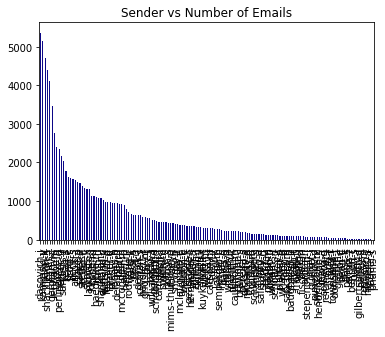

In [ ]:
categories = df.Person.unique()
print('Number of People: ', categories)
print()
df.Person.value_counts().plot(kind='bar', title='Sender vs Number of Emails', cmap='plasma')

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print('Training set Shape: {}  | Test set Shape: {}'.format(X_train.shape, X_test.shape))

Training set Shape: (76458, 39200)  | Test set Shape: (19115, 39200)


# Naive Bayes Classifier

In [ ]:
nb_model = MultinomialNB()
print('Number of documents = {}  |  Number of features = {}'.format(X_train.shape[0], X_train.shape[1]))
st_time = time.time()
predictions, accuracy, metrics_report, nb_prf = train_test_model(nb_model, X_train, X_test, y_train, y_test, labels)
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))
print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)


Number of documents = 76458  |  Number of features = 39200
Start training...done!
Start testing...done!
Total time: 1.09s
accuracy: 0.34433690818728746
                 precision    recall  f1-score   support

       arnold-j       1.00      0.01      0.01       181
       phanis-s       0.88      0.07      0.13       308
     lavorato-j       0.00      0.00      0.00        15
      stclair-c       0.00      0.00      0.00         1
     townsend-j       0.00      0.00      0.00         3
       forney-j       0.89      0.36      0.51       324
        symes-k       0.00      0.00      0.00        19
    reitmeyer-j       0.95      0.42      0.59       316
        hyatt-k       0.00      0.00      0.00         4
      steffes-j       0.99      0.36      0.53       186
     kaminski-v       0.00      0.00      0.00        41
        wolfe-j       1.00      0.04      0.07       114
    mcconnell-m       1.00      0.04      0.08        93
     skilling-j       0.00      0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

# Logistic Regression

In [ ]:
log_model = LogisticRegression(penalty='l2', max_iter=500)
print('Number of documents = {}  |  Number of features = {}'.format(X_train.shape[0], X_train.shape[1]))
st_time = time.time()
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train, X_test, y_train, y_test, labels)
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))
print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

Number of documents = 76458  |  Number of features = 39200
Start training...done!
Start testing...done!
Total time: 525.35s
accuracy: 0.6256866335338739
                 precision    recall  f1-score   support

       arnold-j       0.83      0.51      0.63       181
       phanis-s       0.68      0.47      0.56       308
     lavorato-j       0.00      0.00      0.00        15
      stclair-c       0.00      0.00      0.00         1
     townsend-j       0.00      0.00      0.00         3
       forney-j       0.73      0.61      0.67       324
        symes-k       1.00      0.05      0.10        19
    reitmeyer-j       0.84      0.82      0.83       316
        hyatt-k       0.00      0.00      0.00         4
      steffes-j       0.95      0.91      0.93       186
     kaminski-v       0.75      0.07      0.13        41
        wolfe-j       0.91      0.83      0.87       114
    mcconnell-m       0.91      0.45      0.60        93
     skilling-j       0.88      0.26      0.40  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

## SVM (Support Vector Machine)

In [ ]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)
print('Number of documents = {}  |  Number of features = {}'.format(X_train.shape[0], X_train.shape[1]))
st_time = time.time()
predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train, X_test, y_train, y_test, labels)
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))
print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

Number of documents = 76458  |  Number of features = 39200
Start training...done!
Start testing...done!
Total time: 26.86s
accuracy: 0.605650013078734
                 precision    recall  f1-score   support

       arnold-j       0.81      0.43      0.56       181
       phanis-s       0.79      0.40      0.53       308
     lavorato-j       0.23      0.53      0.32        15
      stclair-c       0.01      1.00      0.02         1
     townsend-j       0.20      0.33      0.25         3
       forney-j       0.83      0.55      0.66       324
        symes-k       0.20      0.47      0.28        19
    reitmeyer-j       0.90      0.81      0.86       316
        hyatt-k       0.03      0.25      0.05         4
      steffes-j       0.90      0.95      0.92       186
     kaminski-v       0.16      0.29      0.21        41
        wolfe-j       0.79      0.85      0.82       114
    mcconnell-m       0.71      0.48      0.58        93
     skilling-j       0.52      0.47      0.49    

## Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0)
print('Number of documents = {}  |  Number of features = {}'.format(X_train.shape[0], X_train.shape[1]))
st_time = time.time()
predictions, accuracy, metrics_report, rf_prf = train_test_model(rf_model, X_train, X_test, y_train, y_test, labels)
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))
print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

Number of documents = 76458  |  Number of features = 39200
Start training...done!
Start testing...done!
Total time: 67.76s
accuracy: 0.5886476589066179
                 precision    recall  f1-score   support

       arnold-j       0.86      0.39      0.54       181
       phanis-s       0.86      0.38      0.52       308
     lavorato-j       1.00      0.13      0.24        15
      stclair-c       0.00      0.00      0.00         1
     townsend-j       0.00      0.00      0.00         3
       forney-j       0.84      0.52      0.65       324
        symes-k       0.00      0.00      0.00        19
    reitmeyer-j       0.89      0.80      0.84       316
        hyatt-k       0.00      0.00      0.00         4
      steffes-j       0.93      0.94      0.93       186
     kaminski-v       1.00      0.02      0.05        41
        wolfe-j       0.88      0.81      0.84       114
    mcconnell-m       0.97      0.38      0.54        93
     skilling-j       0.95      0.36      0.53   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

## Gradient Boosting

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=50, max_depth=10)
predictions, accuracy, metrics_report, gb_prf = train_test_model(gb_model, X_train, X_test, y_train, y_test, labels)
print('accuracy: {}'.format(accuracy))
print(metrics_report)

Start training...

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=2)
print('Number of documents = {}  |  Number of features = {}'.format(X_train.shape[0], X_train.shape[1]))
st_time = time.time()
predictions, accuracy, metrics_report, rf_prf = train_test_model(KNN_model, X_train, X_test, y_train, y_test, labels)
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))
print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

Number of documents = 76458  |  Number of features = 39200
Start training...done!
Start testing...done!
Total time: 82.19s
accuracy: 0.25859272822390794
                 precision    recall  f1-score   support

       arnold-j       0.54      0.11      0.18       181
       phanis-s       0.34      0.25      0.29       308
     lavorato-j       0.00      0.00      0.00        15
      stclair-c       0.00      0.00      0.00         1
     townsend-j       0.67      0.67      0.67         3
       forney-j       0.56      0.42      0.48       324
        symes-k       0.25      0.11      0.15        19
    reitmeyer-j       0.65      0.32      0.43       316
        hyatt-k       0.00      0.00      0.00         4
      steffes-j       0.84      0.45      0.58       186
     kaminski-v       0.33      0.17      0.23        41
        wolfe-j       0.70      0.40      0.51       114
    mcconnell-m       0.34      0.15      0.21        93
     skilling-j       0.00      0.67      0.01  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat